<a href="https://colab.research.google.com/github/Alerakha/05_Aleron-Tsaqif-Rakha_PCVK_Ganjil_2024/blob/main/Pertemuan9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


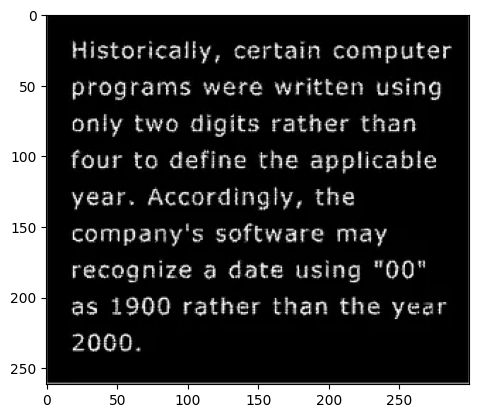

In [4]:
# prompt: import drive

from google.colab import drive
drive.mount('/content/drive')
import cv2
import numpy as np
from matplotlib import pyplot as plt
filename = ('/content/drive/MyDrive/PCVK/Images/morphology.png')
img = cv2.imread(filename)
plt.imshow(img)
plt.show()

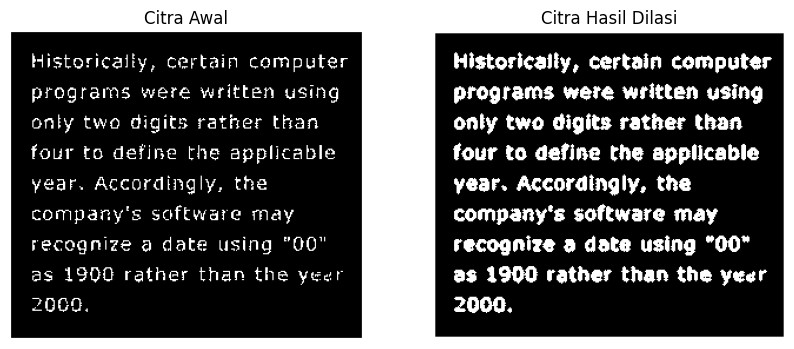

In [6]:
# Fungsi untuk dilasi dengan SE berbentuk cross 3x3
def dilasi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    # Proses dilasi
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            # Lakukan dilasi: jika ada piksel dalam neighborhood yang sesuai dengan SE (cross) adalah 1, maka hasilnya 1
            if np.any(neighborhood[SE == 1] == 255):
                output_image[i-1, j-1] = 255

    return output_image

# Structuring element berbentuk cross 3x3
SE_cross = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]])

# Membaca gambar input
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png')

# Konversi gambar menjadi grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mengubah citra grayscale menjadi biner menggunakan threshold
_, image_binary = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY)

# Terapkan dilasi
dilated_image = dilasi_citra(image_binary, SE_cross)

# Menampilkan hasil
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah dilasi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.show()

Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


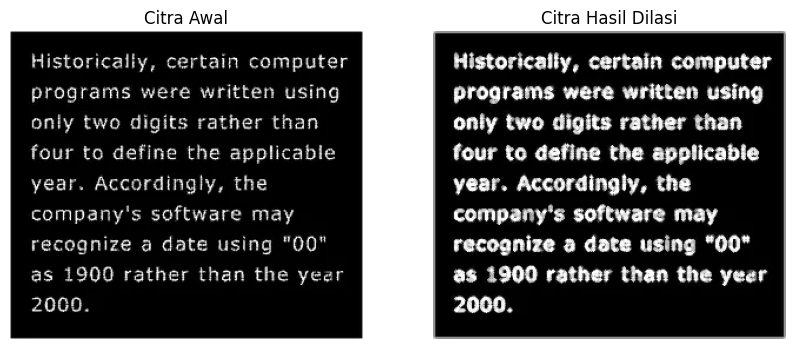

In [8]:
# Membaca gambar input
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png')

# Structuring Element Dilasi berbentuk cross 3x3
SE_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Mencetak Structuring Element
print("Structuring Element (Cross 3x3):")
print(SE_cross)

# Melakukan operasi dilasi pada citra dengan SE berbentuk cross
dilated_image = cv2.dilate(image, SE_cross)

# Menampilkan gambar asli dan hasil dilasi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gambar setelah dilasi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.show()

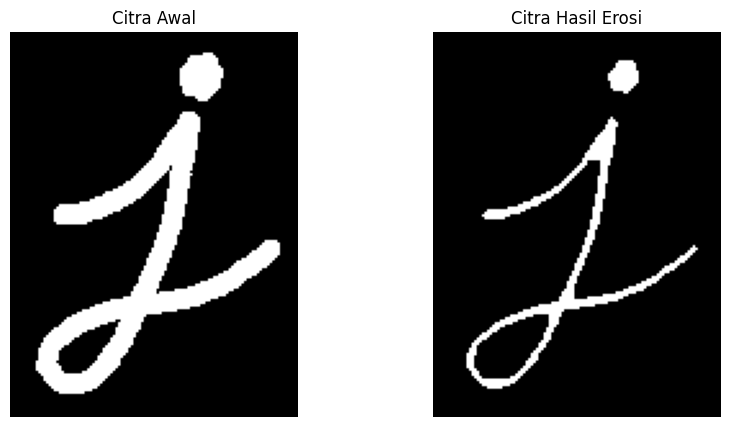

In [9]:
# Fungsi untuk melakukan erosi dengan SE berbentuk square 5x5
def erosi_citra(image, SE):
    # Ukuran citra
    rows, cols = image.shape

    # Buat citra hasil erosi dengan padding
    output_image = np.zeros((rows, cols), dtype=np.uint8)

    # Menambahkan padding 2 pixel di sekeliling gambar untuk memproses tepian
    padded_image = np.pad(image, pad_width=2, mode='constant', constant_values=0)

    # Ukuran SE
    SE_rows, SE_cols = SE.shape

    # Proses erosi
    for i in range(2, rows + 2):
        for j in range(2, cols + 2):
            # Ambil neighborhood 5x5 dari piksel
            neighborhood = padded_image[i-2:i+3, j-2:j+3]
            # Lakukan erosi: jika semua piksel dalam neighborhood sesuai dengan SE, maka hasilnya 1
            if np.all(neighborhood[SE == 1] == 255):
                output_image[i-2, j-2] = 255

    return output_image

# Structuring element berbentuk square 5x5
SE_square = np.ones((5, 5), dtype=np.uint8)

# Membaca gambar input dalam grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan erosi
eroded_image = erosi_citra(image_binary, SE_square)

# Menampilkan hasil
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah erosi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.show()

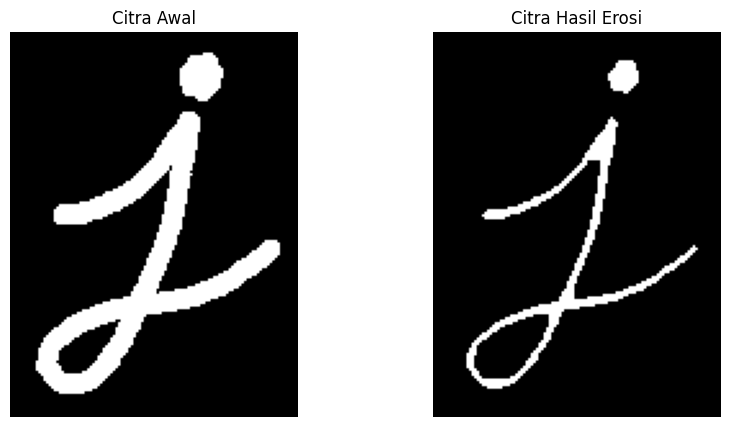

In [10]:
# Membaca gambar input dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat structuring element berbentuk square 5x5
SE_square = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Melakukan operasi erosi pada citra
eroded_image = cv2.erode(image, SE_square)

# Menampilkan gambar hasil sebelum dan setelah erosi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gambar setelah erosi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.show()

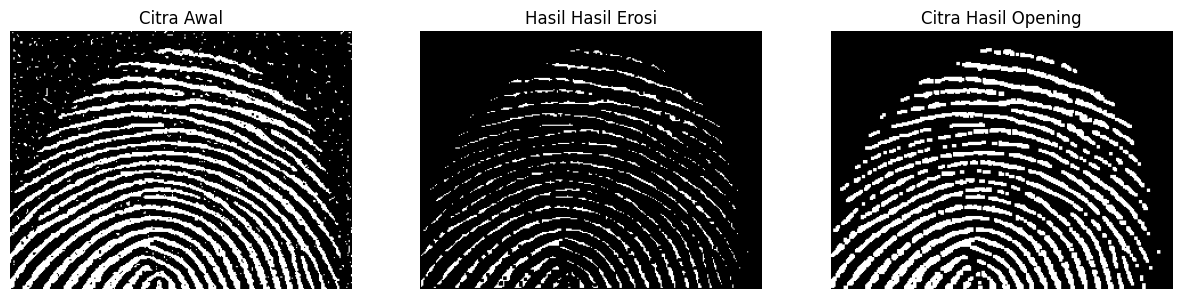

In [11]:
# Fungsi erosi
def erosi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            if np.all(neighborhood[SE == 1] == 255):
                output_image[i-1, j-1] = 255

    return output_image

# Fungsi dilasi
def dilasi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            if np.any(neighborhood[SE == 1] == 255):
                output_image[i-1, j-1] = 255

    return output_image

# Fungsi untuk melakukan operasi opening
def opening_citra(image, SE):
    eroded_image = erosi_citra(image, SE)
    opened_image = dilasi_citra(eroded_image, SE)
    return eroded_image, opened_image

# Membuat structuring element berbentuk square 3x3
SE_square = np.ones((3, 3), dtype=np.uint8)

# Membaca gambar input dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan operasi opening
eroded_image_manual, opened_image_manual = opening_citra(image_binary, SE_square)

# Menampilkan hasil tanpa library OpenCV
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah erosi (manual)
plt.subplot(1, 3, 2)
plt.title('Hasil Hasil Erosi')
plt.imshow(eroded_image_manual, cmap='gray')
plt.axis('off')

# Gambar setelah operasi opening (manual)
plt.subplot(1, 3, 3)
plt.title('Citra Hasil Opening')
plt.imshow(opened_image_manual, cmap='gray')
plt.axis('off')

plt.show()

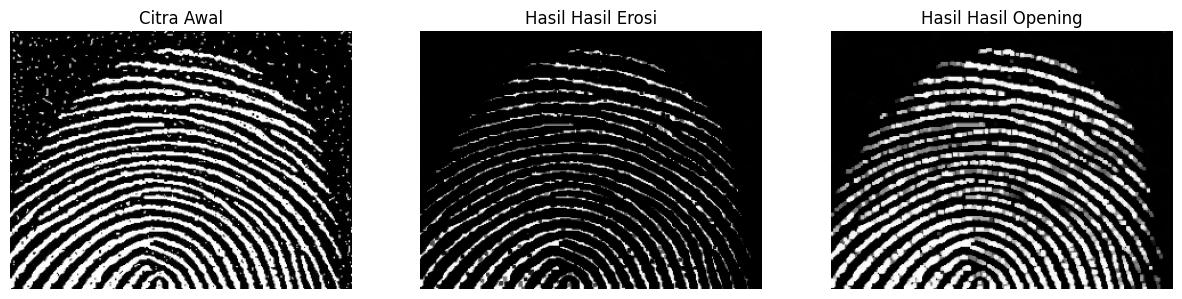

In [12]:
# Membaca gambar input dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat structuring element berbentuk square 3x3
SE_square = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi erosi menggunakan fungsi morphology dari OpenCV
eroded_image_opencv = cv2.erode(image, SE_square)

# Melakukan operasi opening menggunakan fungsi morphology dari OpenCV
opened_image_opencv = cv2.morphologyEx(image, cv2.MORPH_OPEN, SE_square)

# Menampilkan hasil dengan library OpenCV
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gambar setelah erosi (OpenCV)
plt.subplot(1, 3, 2)
plt.title('Hasil Hasil Erosi')
plt.imshow(eroded_image_opencv, cmap='gray')
plt.axis('off')

# Gambar setelah operasi opening (OpenCV)
plt.subplot(1, 3, 3)
plt.title('Hasil Hasil Opening')
plt.imshow(opened_image_opencv, cmap='gray')
plt.axis('off')

plt.show()

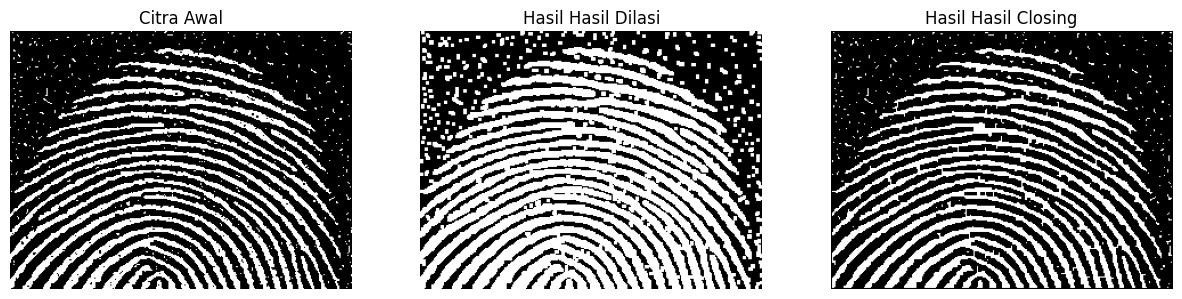

In [13]:
# Fungsi untuk melakukan erosi
def erosi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    SE_rows, SE_cols = SE.shape

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            if np.all(neighborhood[SE == 1] == 255):
                output_image[i-1, j-1] = 255

    return output_image

# Fungsi untuk melakukan dilasi
def dilasi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    SE_rows, SE_cols = SE.shape

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            if np.any(neighborhood[SE == 1] == 255):
                output_image[i-1, j-1] = 255

    return output_image

# Fungsi untuk melakukan operasi closing
def closing_citra(image, SE):
    dilated_image = dilasi_citra(image, SE)
    closed_image = erosi_citra(dilated_image, SE)
    return dilated_image, closed_image

# Membaca gambar input dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat structuring element berbentuk square 3x3
SE_square = np.ones((3, 3), dtype=np.uint8)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan operasi closing
dilated_image_manual, closed_image_manual = closing_citra(image_binary, SE_square)

# Menampilkan hasil tanpa library OpenCV
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah operasi dilasi (manual)
plt.subplot(1, 3, 2)
plt.title('Hasil Hasil Dilasi')
plt.imshow(dilated_image_manual, cmap='gray')
plt.axis('off')

# Gambar setelah operasi closing (manual)
plt.subplot(1, 3, 3)
plt.title('Hasil Hasil Closing')
plt.imshow(closed_image_manual, cmap='gray')
plt.axis('off')

plt.show()

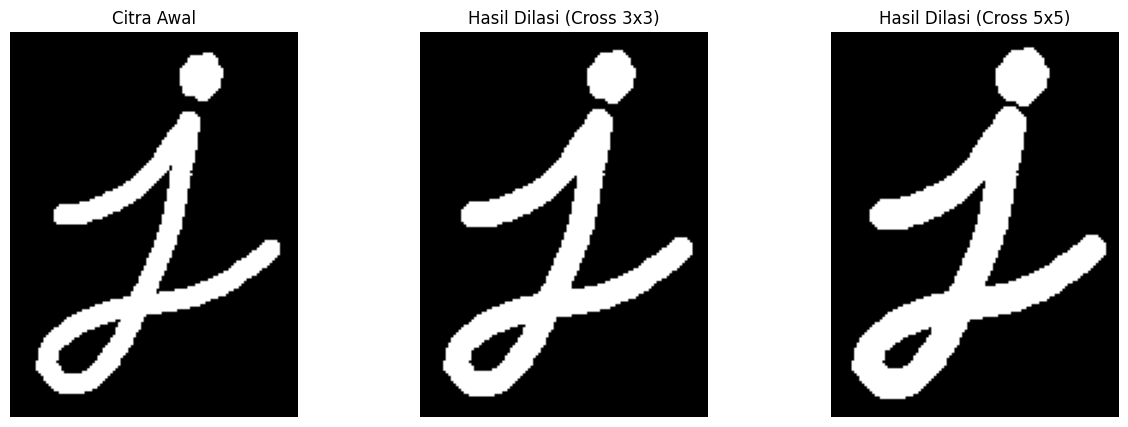

In [14]:
# Fungsi untuk melakukan dilasi
def dilasi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)

    # Padding untuk SE 3x3 dan 5x5
    pad_size = SE.shape[0] // 2
    padded_image = np.pad(image, pad_width=pad_size, mode='constant', constant_values=0)

    # Proses dilasi
    for i in range(pad_size, rows + pad_size):
        for j in range(pad_size, cols + pad_size):
            neighborhood = padded_image[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            if np.any(neighborhood[SE == 1] == 255):
                output_image[i-pad_size, j-pad_size] = 255

    return output_image

# Membuat structuring element berbentuk cross 3x3 dan 5x5
SE_cross_3x3 = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]], dtype=np.uint8)

SE_cross_5x5 = np.array([[0, 0, 1, 0, 0],
                          [0, 0, 1, 0, 0],
                          [1, 1, 1, 1, 1],
                          [0, 0, 1, 0, 0],
                          [0, 0, 1, 0, 0]], dtype=np.uint8)

# Membaca gambar input dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan operasi dilasi
dilated_image_cross_3x3 = dilasi_citra(image_binary, SE_cross_3x3)
dilated_image_cross_5x5 = dilasi_citra(image_binary, SE_cross_5x5)

# Menampilkan hasil dilasi
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah operasi dilasi (Cross 3x3)
plt.subplot(1, 3, 2)
plt.title('Hasil Dilasi (Cross 3x3)')
plt.imshow(dilated_image_cross_3x3, cmap='gray')
plt.axis('off')

# Gambar setelah operasi dilasi (Cross 5x5)
plt.subplot(1, 3, 3)
plt.title('Hasil Dilasi (Cross 5x5)')
plt.imshow(dilated_image_cross_5x5, cmap='gray')
plt.axis('off')

plt.show()

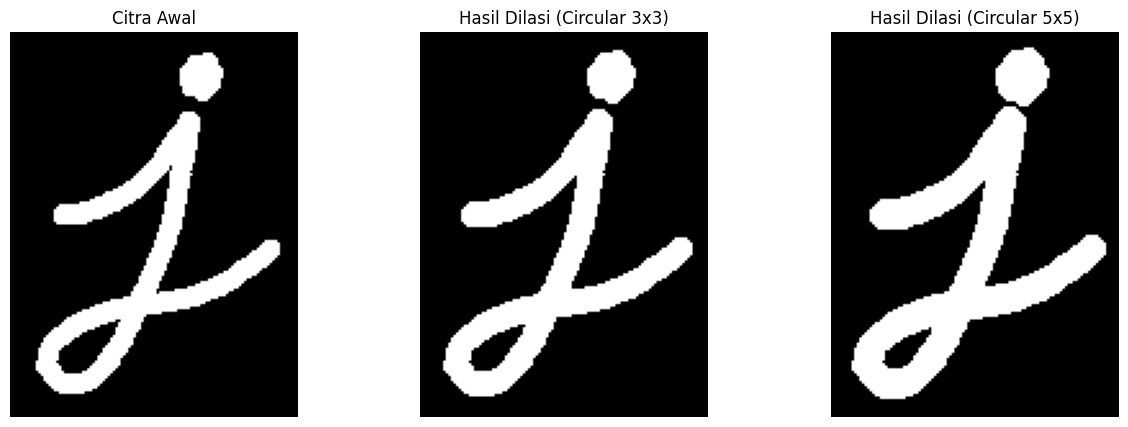

In [15]:
# Fungsi untuk membuat structuring element berbentuk circular
def create_circular_structuring_element(radius):
    size = radius * 2 + 1
    SE = np.zeros((size, size), dtype=np.uint8)
    center = radius
    for i in range(size):
        for j in range(size):
            if (i - center) ** 2 + (j - center) ** 2 <= radius ** 2:
                SE[i, j] = 1
    return SE

# Fungsi untuk melakukan dilasi
def dilasi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)

    # Padding untuk SE 3x3 dan 5x5
    pad_size = SE.shape[0] // 2
    padded_image = np.pad(image, pad_width=pad_size, mode='constant', constant_values=0)

    # Proses dilasi
    for i in range(pad_size, rows + pad_size):
        for j in range(pad_size, cols + pad_size):
            neighborhood = padded_image[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            if np.any(neighborhood[SE == 1] == 255):
                output_image[i-pad_size, j-pad_size] = 255

    return output_image

# Membuat structuring element berbentuk circular 3x3 dan 5x5
SE_circular_3x3 = create_circular_structuring_element(radius=1)
SE_circular_5x5 = create_circular_structuring_element(radius=2)

# Membaca gambar input dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan operasi dilasi
dilated_image_circular_3x3 = dilasi_citra(image_binary, SE_circular_3x3)
dilated_image_circular_5x5 = dilasi_citra(image_binary, SE_circular_5x5)

# Menampilkan hasil dilasi
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah operasi dilasi (Circular 3x3)
plt.subplot(1, 3, 2)
plt.title('Hasil Dilasi (Circular 3x3)')
plt.imshow(dilated_image_circular_3x3, cmap='gray')
plt.axis('off')

# Gambar setelah operasi dilasi (Circular 5x5)
plt.subplot(1, 3, 3)
plt.title('Hasil Dilasi (Circular 5x5)')
plt.imshow(dilated_image_circular_5x5, cmap='gray')
plt.axis('off')

plt.show()

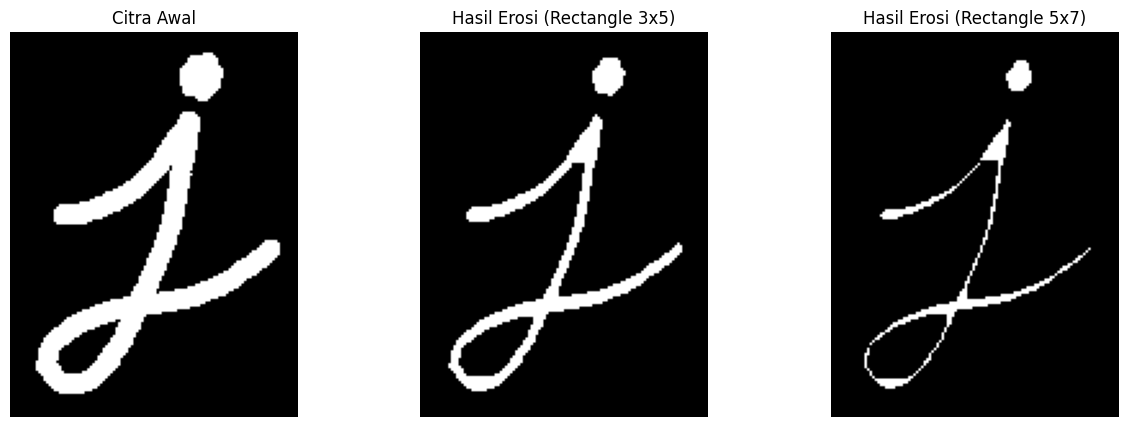

In [16]:
# Fungsi untuk melakukan erosi
def erosi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)

    # Padding untuk SE 3x5 dan 5x7
    pad_size = (SE.shape[0] // 2, SE.shape[1] // 2)
    padded_image = np.pad(image, pad_width=pad_size, mode='constant', constant_values=0)

    # Proses erosi
    for i in range(rows):
        for j in range(cols):
            # Ambil neighborhood
            neighborhood = padded_image[i:i+SE.shape[0], j:j+SE.shape[1]]
            # Cek apakah semua elemen SE yang aktif ada di neighborhood
            erosi = True  # Anggap true dulu
            for m in range(SE.shape[0]):
                for n in range(SE.shape[1]):
                    if SE[m, n] == 1:  # Hanya periksa yang aktif di SE
                        if neighborhood[m, n] != 255:  # Jika tidak 255, set erosi menjadi false
                            erosi = False
                            break
                if not erosi:
                    break
            output_image[i, j] = 255 if erosi else 0  # Jika erosi true, set output ke 255, jika tidak ke 0

    return output_image

# Membuat structuring element berbentuk rectangle 3x5 dan 5x7
SE_rectangle_3x5 = np.ones((3, 5), dtype=np.uint8)
SE_rectangle_5x7 = np.ones((5, 7), dtype=np.uint8)

# Membaca gambar input dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan operasi erosi
eroded_image_rectangle_3x5 = erosi_citra(image_binary, SE_rectangle_3x5)
eroded_image_rectangle_5x7 = erosi_citra(image_binary, SE_rectangle_5x7)

# Menampilkan hasil erosi
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah operasi erosi (Rectangle 3x5)
plt.subplot(1, 3, 2)
plt.title('Hasil Erosi (Rectangle 3x5)')
plt.imshow(eroded_image_rectangle_3x5, cmap='gray')
plt.axis('off')

# Gambar setelah operasi erosi (Rectangle 5x7)
plt.subplot(1, 3, 3)
plt.title('Hasil Erosi (Rectangle 5x7)')
plt.imshow(eroded_image_rectangle_5x7, cmap='gray')
plt.axis('off')

plt.show()

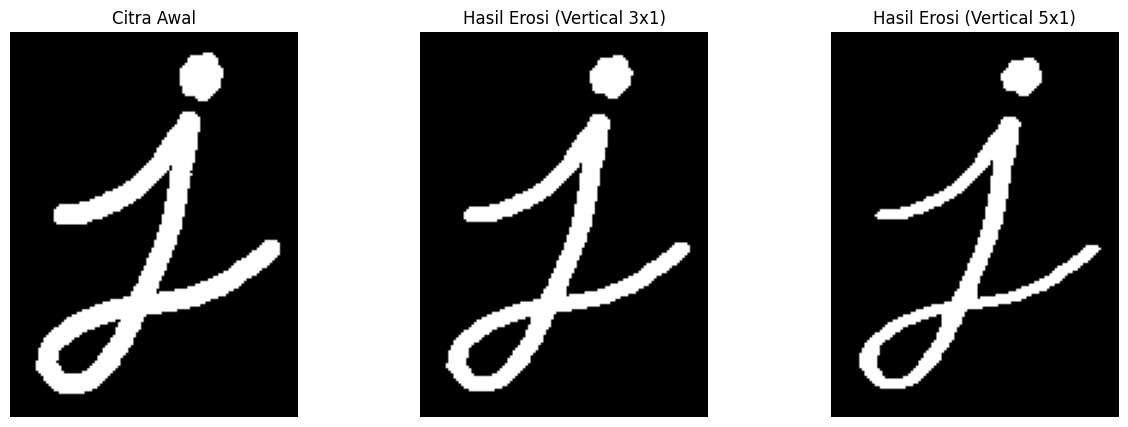

In [17]:
# Fungsi untuk melakukan erosi
def erosi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)

    # Padding untuk SE 3x1 dan 5x1
    pad_size = (SE.shape[0] // 2, SE.shape[1] // 2)
    padded_image = np.pad(image, pad_width=((pad_size[0], pad_size[0]), (0, 0)), mode='constant', constant_values=0)

    # Proses erosi
    for i in range(rows):
        for j in range(cols):
            # Ambil neighborhood sesuai dengan ukuran SE
            neighborhood = padded_image[i:i + SE.shape[0], j]
            # Cek apakah semua elemen SE yang aktif ada di neighborhood
            if (neighborhood[SE[:, 0] == 1] == 255).all():
                output_image[i, j] = 255
            else:
                output_image[i, j] = 0

    return output_image

# Membuat structuring element berbentuk garis vertikal 3x1 dan 5x1
SE_vertical_3x1 = np.array([[1], [1], [1]], dtype=np.uint8)  # 3x1
SE_vertical_5x1 = np.array([[1], [1], [1], [1], [1]], dtype=np.uint8)  # 5x1

# Membaca gambar input dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan operasi erosi
eroded_image_vertical_3x1 = erosi_citra(image_binary, SE_vertical_3x1)
eroded_image_vertical_5x1 = erosi_citra(image_binary, SE_vertical_5x1)

# Menampilkan hasil erosi
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah operasi erosi (Vertical 3x1)
plt.subplot(1, 3, 2)
plt.title('Hasil Erosi (Vertical 3x1)')
plt.imshow(eroded_image_vertical_3x1, cmap='gray')
plt.axis('off')

# Gambar setelah operasi erosi (Vertical 5x1)
plt.subplot(1, 3, 3)
plt.title('Hasil Erosi (Vertical 5x1)')
plt.imshow(eroded_image_vertical_5x1, cmap='gray')
plt.axis('off')

plt.show()

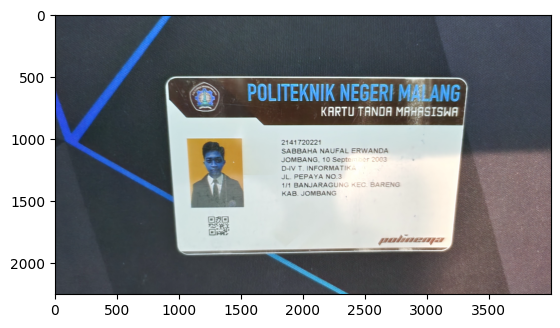

In [22]:
image = cv2.imread('Naufal.jpg',cv2)
plt.imshow(image)
plt.show()